# **About the dataset:**
 A collection of all data  on marine mammals that spent some period of time captive in the US between 1938 and May 7, 2017.


In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
#reading the dataset into a dataframe

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-12-18/allCetaceanData.csv',error_bad_lines=False,encoding='latin-1')
print(df.shape)
df.head()

In [ ]:
df['species'].value_counts()

# **Part 1**
# Lets plot the trend of how these mammals were acquired over the years.

 For this, I needed to extract the year from the column 'originDate' and then plotted it using the Seaborn library.

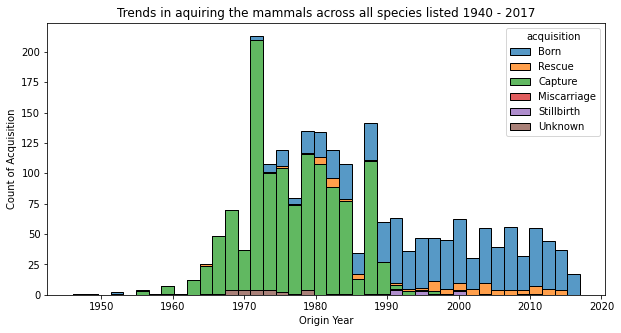

In [5]:
#Creating another column of the origin  year by ectracting it from the origin date
df['originDate'] = pd.to_datetime(df['originDate'],format= '%Y-%m-%d')
df['originYear'] = pd.DatetimeIndex(df['originDate']).year

#Plotting acquisition-count vs year
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)

sns.histplot(data= df, ax=ax, stat="count", multiple="stack",
             x="originYear", kde=False,
             hue="acquisition",bins=40,
             element="bars", legend=True)
ax.set_title("Trends in aquiring the mammals across all species listed 1940 - 2017")
ax.set_xlabel("Origin Year")
ax.set_ylabel("Count of Acquisition")
plt.show()

# Narrowing down our research to all Dolphins and Orcas in the dataset

In [6]:
#creating a dataset for only Bottlenose and Orcas
df_ceta = df[(df['species'] == "Bottlenose") | (df['species'] == "Killer Whale; Orca")]
df_ceta.head(100)
df_ceta.shape

(1747, 23)

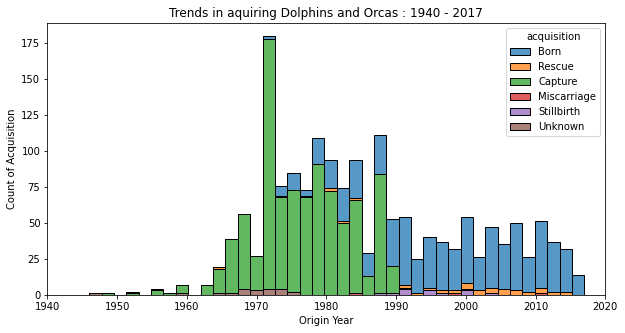

In [7]:
# Plotting for only Refined dataset

f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)

sns.histplot(data= df_ceta, ax=ax, stat="count", multiple="stack",
             x="originYear", kde=False,
             hue="acquisition",bins=40, 
             element="bars", legend=True)
ax.set_title("Trends in aquiring Dolphins and Orcas : 1940 - 2017")
ax.set_xlabel("Origin Year")
ax.set_ylabel("Count of Acquisition")
ax.set_xlim([1940,2020])
plt.show()

# **Observations:**
**Captured:** We can see that between 1940–1960, mammals captured were below 20. However, in the 1960s, these numbers gradually increased. The captured numbers rose exponentially in 1970 -1972. This, in my opinion, could be attributed to the success of Sea World, San Diego(established in 1964), and Sea World. Orlando ( established in 1973).

**Born/Stillbirth:** We also notice that a few mammals were also born in captivity between 1970–1972 and the number of mammals born in captivity continues to grow ever since then. In the 1990s, capturing these mammals stopped. It became illegal to capture Orcas and a few other mammals. This probably got organizations to recognize the need to improve the breeding program for their benefit as we notice the number of stillbirths also reduce.

**Rescued:** In the late 1990s, we noticed that these organizations began to rescue animals which is very encouraging.

**Plotting male vs female count**

In [8]:
print(df_ceta['sex'].value_counts())
df_ceta['sex'].isnull().sum()

F    919
M    746
U     82
Name: sex, dtype: int64


0

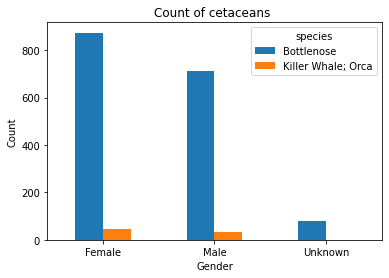

In [9]:
pd.crosstab(index=df_ceta['sex'],columns= df_ceta['species']).plot(kind='bar')
plt.xticks([0,1,2],labels=["Female","Male","Unknown"],rotation = "horizontal")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Count of cetaceans ")
plt.show()

Result:

We can see that there are about 80 bottlenose dolphins whose gender has not been identified yet.

In [10]:
#Dropping unwanted columns
cetacean = df_ceta.copy()
cetacean.drop(['statusDate','notes'],axis=1,inplace=True)
cetacean.head()

,Unnamed: 0,species,id,name,sex,accuracy,birthYear,acquisition,originDate,originLocation,mother,father,transfers,currently,region,status,COD,transferDate,transfer,entryDate,originYear
0,1,Bottlenose,"NOA0004614, AZA 428, MLF-428",Dazzle,F,a,1989,Born,1989-04-07,Marineland Florida,Betty III,Davy II,NaN,Marineland Florida,US,Alive,NaN,NaN,US,1989-04-07,1989.0
1,2,Bottlenose,"NOA0004386, AZA 138, IDR-73-1",Tursi,F,a,1973,Born,1973-11-26,Dolphin Research Center,Little Bit,Mr. Gipper,NaN,Dolphin Research Center,US,Alive,NaN,NaN,US,1973-11-26,1973.0
2,3,Bottlenose,"NOA0002137, SWC-TTG-7816",Starbuck,M,a,1978,Born,1978-05-13,SeaWorld San Diego,Cindy (T.t. gilli),Sambo,SeaWorld San Diego to SeaWorld Aurora (??-???-...,SeaWorld Orlando,US,Alive,NaN,NaN,US,1978-05-13,1978.0
3,4,Bottlenose,"NOA0002690, SWF-TT-7903",Sandy,F,a,1979,Born,1979-02-03,SeaWorld Orlando,Gigi,NaN,SeaWorld Orlando to SeaWorld San Diego (< Aug ...,SeaWorld San Diego,US,Alive,NaN,NaN,US,1979-02-03,1979.0
4,5,Bottlenose,"NOA0004418, AZA 242, SWF-TT-7904, MH-82-36-TT ...",Sandy,M,a,1979,Born,1979-08-15,SeaWorld Orlando,Wendy,NaN,SeaWorld Orlando to New England Aquarium (22-F...,Dolphin Research Center,US,Alive,NaN,NaN,US,1979-08-15,1979.0


# **Part 2**
# Is there a relationship between where the mammals are (captive/wild) and the survival rate?

##Feature Engineering to do a study on the relation between cetacean Acquisition and Status

In [11]:
#Filtering for cetaceans born / captured / rescued

condition = (cetacean['acquisition'] == "Born") | (cetacean['acquisition'] == "Capture") |(cetacean['acquisition'] == "Rescue")

cetacean_acquisition = cetacean[condition]
#cetacean_acquisition.shape

In [12]:
#Filtering for cetaceans dead/alive and captive / released
condition_status = (cetacean['status'] == "Died") | (cetacean['status'] == "Alive") | (cetacean['status'] == "Released")
cetacean_status  = cetacean[condition_status]
#cetacean_status.shape

In [13]:
#Merge the two dataframes

cetacean_acquisition_status = pd.merge(cetacean_acquisition,cetacean_status,how ='inner')
print(cetacean_acquisition_status.shape)
cetacean_acquisition_status.head()

(1630, 21)


,Unnamed: 0,species,id,name,sex,accuracy,birthYear,acquisition,originDate,originLocation,mother,father,transfers,currently,region,status,COD,transferDate,transfer,entryDate,originYear
0,1,Bottlenose,"NOA0004614, AZA 428, MLF-428",Dazzle,F,a,1989,Born,1989-04-07,Marineland Florida,Betty III,Davy II,NaN,Marineland Florida,US,Alive,NaN,NaN,US,1989-04-07,1989.0
1,2,Bottlenose,"NOA0004386, AZA 138, IDR-73-1",Tursi,F,a,1973,Born,1973-11-26,Dolphin Research Center,Little Bit,Mr. Gipper,NaN,Dolphin Research Center,US,Alive,NaN,NaN,US,1973-11-26,1973.0
2,3,Bottlenose,"NOA0002137, SWC-TTG-7816",Starbuck,M,a,1978,Born,1978-05-13,SeaWorld San Diego,Cindy (T.t. gilli),Sambo,SeaWorld San Diego to SeaWorld Aurora (??-???-...,SeaWorld Orlando,US,Alive,NaN,NaN,US,1978-05-13,1978.0
3,4,Bottlenose,"NOA0002690, SWF-TT-7903",Sandy,F,a,1979,Born,1979-02-03,SeaWorld Orlando,Gigi,NaN,SeaWorld Orlando to SeaWorld San Diego (< Aug ...,SeaWorld San Diego,US,Alive,NaN,NaN,US,1979-02-03,1979.0
4,5,Bottlenose,"NOA0004418, AZA 242, SWF-TT-7904, MH-82-36-TT ...",Sandy,M,a,1979,Born,1979-08-15,SeaWorld Orlando,Wendy,NaN,SeaWorld Orlando to New England Aquarium (22-F...,Dolphin Research Center,US,Alive,NaN,NaN,US,1979-08-15,1979.0


##Now we need to conduct the chi-square test as we are dealing with two categorical variables

**Ho:** There is no relationship between cetaceans acquisition and status

**Ha:** There is relationship between cetaceans acquisition and status


In [14]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(cetacean_acquisition_status['acquisition'], cetacean_acquisition_status['status']))

print("Chi2 statistic is:", chi2)
print("P-value is:", p_value)
#print("Deg of freedom is:", dof)
#print("Expected array is:", expected)

Chi2 statistic is: 361.13171143198934
P-value is: 6.922762352409928e-77


##Result

**Based on a chi2 statistic of 361 and a p-value of ~0, we reject the null hypothesis that there is no relationship between cetacean aquisition and status, and we suggest the alternative, that there is an association between these two categorical variables.**

##Graph - Percentage of cetaceans status by type of acquisition

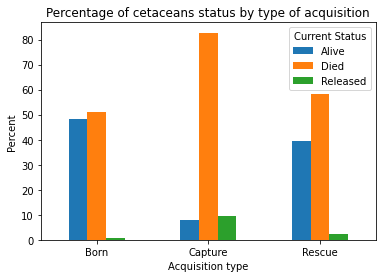

In [15]:
#Graph - Percentage of cetaceans status by type of acquisition


(pd.crosstab(cetacean_acquisition_status['acquisition'], cetacean_acquisition_status['status'],normalize='index')*100).plot(kind='bar')
plt.title("Percentage of cetaceans status by type of acquisition")
plt.legend(title='Current Status')
plt.xticks(rotation='horizontal')
plt.ylabel('Percent')
plt.xlabel("Acquisition type")

plt.show()

##Conclusions:

1. This graph clearly shows that cetaceans that were captured have a lower survival rate in comparison to cetaceans bred in captivity or those that were rescued by the various marine organizations. 

2. Although not very significant , it is reassuring to note that the release of these mammals is improving given the fact that mammals born in capitivity are also being released.

# **Part 3**
# Plotting all Cetaceans on the US map

In [44]:
#Listing out the places the mammals currently are as of May 2017
df['currently'].value_counts()

Unknown                                265
U.S. Navy                              206
SeaWorld San Diego                     203
SeaWorld Orlando                       140
Sea Life Park Hawaii                   124
                                      ... 
Knott's Berry Farm                       1
Sea World San Antonio                    1
Institute for Marine Mammal Studies      1
Pittsburgh Zoo                           1
Six Flags Mid America                    1
Name: currently, Length: 97, dtype: int64

In [36]:
#Loading dataset with the lattitude and longitude values of places listed in the column "currently"

geo_df = pd.read_csv('https://raw.githubusercontent.com/rhiag/Cetaceans/main/all_geo_codes.csv',error_bad_lines=False)

geo_df.rename(columns = {'Place':'currently'}, inplace = True)
geo_df.head()

b'Skipping line 21: expected 3 fields, saw 4\nSkipping line 32: expected 3 fields, saw 5\nSkipping line 49: expected 3 fields, saw 4\n'


,currently,Lat,Long
0,Marineland Florida,29.66934,-81.212670
1,Dolphin Research Center,24.76794,-80.944550
2,SeaWorld Orlando,28.41164,-81.459106
3,SeaWorld San Diego,32.76113,-117.219980
4,SeaWorld San Antonio,29.45661,-98.699070


In [37]:
#Merging geo data with all cetacean dataset(df)
final_cetacean = pd.merge(df,geo_df,how ='inner',on = 'currently' )
print(final_cetacean.shape)
final_cetacean.head()


(1683, 25)


,Unnamed: 0,species,id,name,sex,accuracy,birthYear,acquisition,originDate,originLocation,mother,father,transfers,currently,region,status,statusDate,COD,notes,transferDate,transfer,entryDate,originYear,Lat,Long
0,1,Bottlenose,"NOA0004614, AZA 428, MLF-428",Dazzle,F,a,1989,Born,1989-04-07,Marineland Florida,Betty III,Davy II,NaN,Marineland Florida,US,Alive,NaN,NaN,NaN,NaN,US,1989-04-07,1989.0,29.66934,-81.21267
1,11,Bottlenose,"NOA0004607, AZA 362, MLF-410",Sunny,M,a,1984,Born,1984-01-12,Marineland Florida,Nellie,Rusty (blonde),NaN,Marineland Florida,US,Alive,NaN,NaN,"Sunny was originally nicknamed ""Jan""",NaN,US,1984-01-12,1984.0,29.66934,-81.21267
2,32,Bottlenose,"NOA0004617, AZA 447, MLF-431",Roxy,F,a,1990,Born,1990-08-26,Marineland Florida,Pebbles,Chubby,NaN,Marineland Florida,US,Alive,NaN,NaN,NaN,NaN,US,1990-08-26,1990.0,29.66934,-81.21267
3,57,Bottlenose,"NOA0005495, AZA 551, M12015 (Georgia Aquarium)",Zac,M,a,1995,Born,1995-02-23,Gulfarium,Delilah,Panama,Gulfarium Marine Adventure Park to Gulf World ...,Marineland Florida,US,Alive,NaN,NaN,NaN,NaN,US,1995-02-23,1995.0,29.66934,-81.21267
4,123,Bottlenose,"NOA0006016, AZA 817, MPF-105",Casique,F,a,2002,Born,2002-04-30,Marineland Florida,Dazzle,Chubby,NaN,Marineland Florida,US,Alive,NaN,NaN,NaN,NaN,US,2002-04-30,2002.0,29.66934,-81.21267


In [38]:
#Creating a new dataframe with on required information to plot the map
map_df = pd.DataFrame()
map_df.shape

(0, 0)

In [39]:
map_df['currently'] = final_cetacean['currently'].unique()
map_df['Population_mammals'] = final_cetacean.groupby('currently')['currently'].transform('count')
map_df = pd.merge(map_df,geo_df,on='currently',how='inner')
map_df.head()

,currently,Population_mammals,Lat,Long
0,Marineland Florida,67,29.66934,-81.212670
1,Dolphin Research Center,67,24.76794,-80.944550
2,SeaWorld Orlando,67,28.41164,-81.459106
3,SeaWorld San Diego,67,32.76113,-117.219980
4,SeaWorld San Antonio,67,29.45661,-98.699070


In [42]:
#Creating a list of the locations with both lat and long
locations = map_df[['Lat', 'Long']]
locationlist = locations.values.tolist()
len(locationlist)
#Testing for the nth element in the list
locationlist[3]

[32.76113, -117.21998]

In [43]:
#Plotting on the map the location of all known cetaceans in the dataset

map = folium.Map(location=[39.60381, -105.70236], zoom_start=4)
for point in range(0, len(map_df)):
    folium.Marker(locationlist[point], popup=map_df['currently'][point]).add_to(map)
map

# **Limitations:**
- This data set is not current, and I would love to see the trends from 2017 -2021.
- There was no consistency in the way the observations were entered. For ex: the location names were not standardized.

# **What next?**
- It would also be interesting to see how other countries around the world are doing. If mammals released numbers are as encouraging as we see them in the US.
- Reasons of release - if rescued to be treated, or because they were older or something else? 